<a href="https://colab.research.google.com/github/aishwaryabit1603/Ocr_Project/blob/main/ocr_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
pip install python-levenshtein

In [41]:
# pip install pytesseract
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [141]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 16.4 MB/s eta 0:00:00


In [143]:
import numpy as np
import pandas as pd
import cv2
import pytesseract
import Levenshtein
import matplotlib.pyplot as plt
import matplotlib.image as img
from spellchecker import SpellChecker
from google.colab.patches import cv2_imshow  # For image display in Colab

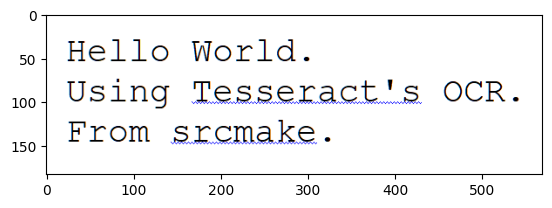

In [163]:
image_file = "/content/ocr_orig.jpg"
image = cv2.imread(image_file)
plt.imshow(image)

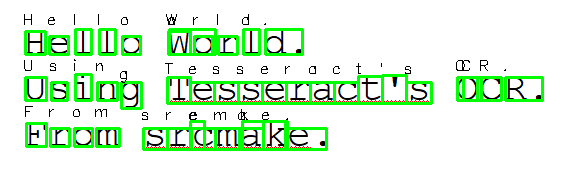

Corrected Text:
hello world using tesseract's or from srcemake.


In [164]:
# Function to preprocess image
def preprocess_image(image_path):
    # Load image
    image = cv2.imread(image_path)

    # Convert image to grayscale
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform adaptive thresholding to get binary image
    binary_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Perform denoising using bilateral filter
    denoised_img = cv2.fastNlMeansDenoising(gray_img, None, h=10, templateWindowSize=7, searchWindowSize=21)

    return image, denoised_img

# Function to detect characters, draw bounding boxes, and overlay recognized characters
def detect_and_overlay_characters(image, processed_image):
    h, w = processed_image.shape

    # Use Tesseract to get bounding boxes and recognized characters
    boxes = pytesseract.image_to_boxes(processed_image)

    # Spell checker initialization
    spell = SpellChecker()

    # Draw boxes and overlay characters outside boxes
    for box in boxes.splitlines():
        box = box.split(' ')
        character = box[0]
        x, y, x2, y2 = int(box[1]), int(box[2]), int(box[3]), int(box[4])

        # Draw green bounding box
        cv2.rectangle(image, (x, h - y), (x2, h - y2), (0, 255, 0), 2)

        # Calculate text position outside the bounding box
        text_width, text_height = cv2.getTextSize(character, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)[0]
        text_x = x - 3  # Adjust this value to position the text relative to the box
        text_y = h - y - 30  # Adjust this value to position the text vertically

        # Overlay character outside the bounding box
        cv2.putText(image, character, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

        # Spell check each recognized character and replace if needed
        corrected_character = spell.correction(character)
        if corrected_character != character:
            cv2.putText(image, corrected_character, (text_x, text_y - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    return image

# Function for post-processing recognized text
# Function for post-processing recognized text
def post_process_text(text):
    # Example: Convert all text to lowercase
    processed_text = text.lower()

    # Example: Remove extra whitespace
    processed_text = ' '.join(processed_text.split())

    # Example: Spell-checking or other text corrections
    spell = SpellChecker()
    corrected_words = []
    for word in processed_text.split():
        corrected_word = spell.correction(word)
        if corrected_word is not None:
            corrected_words.append(corrected_word)
        else:
            corrected_words.append(word)  # Use original word if no correction found

    corrected_text = ' '.join(corrected_words)

    return corrected_text

# Example usage:
image_path = '/content/ocr_orig.jpg'

# Preprocess the image
original_image, processed_image = preprocess_image(image_path)

# Detect characters, draw bounding boxes, and overlay recognized characters
result_image = detect_and_overlay_characters(original_image, processed_image)

# Display the result
cv2_imshow(result_image)

# Extract recognized text
text = pytesseract.image_to_string(processed_image)

# Post-process recognized text
corrected_text = post_process_text(text)
print("Corrected Text:")
print(corrected_text)


In [146]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [165]:
corrected_text

"hello world using tesseract's or from srcemake."

In [152]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import re

Precision: 0.28
Recall: 0.28
F1-score: 0.28


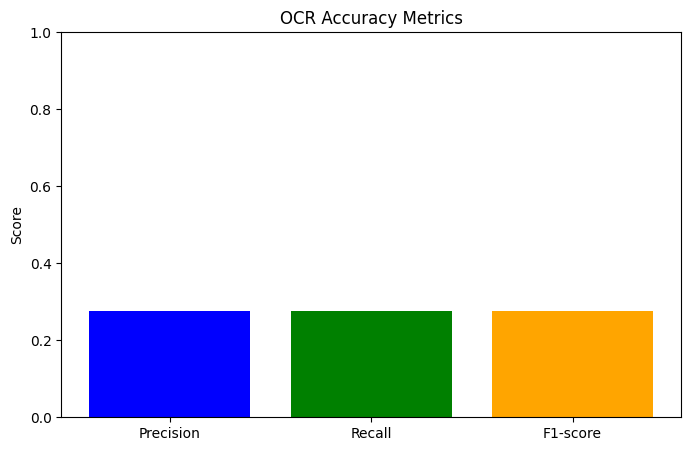

In [166]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import re

# Sample OCR output and ground truth (adjust as per your actual data)
ocr_output = corrected_text
ground_truth = """Hello World .
                Using Tesseract's OCR.
                From srcmake."""

# Function to clean and normalize text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text.strip())  # Remove extra spaces, tabs, and newlines
    return text

# Clean and normalize OCR output and ground truth
ocr_output_clean = clean_text(ocr_output)
ground_truth_clean = clean_text(ground_truth)

# Ensure both texts have the same length
min_length = min(len(ground_truth_clean), len(ocr_output_clean))
ground_truth_clean = ground_truth_clean[:min_length]
ocr_output_clean = ocr_output_clean[:min_length]

# Calculate precision, recall, and F1-score for character-level comparison
precision = precision_score(list(ground_truth_clean), list(ocr_output_clean), average='micro')
recall = recall_score(list(ground_truth_clean), list(ocr_output_clean), average='micro')
f1 = f1_score(list(ground_truth_clean), list(ocr_output_clean), average='micro')

# Print metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Visualize accuracy
labels = ['Precision', 'Recall', 'F1-score']
values = [precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'green', 'orange'])
plt.ylabel('Score')
plt.title('OCR Accuracy Metrics')
plt.ylim(0.0, 1.0)
plt.show()


In [159]:
processed_text

"hello world. using tesseract's ocr. from srcemake."